In [11]:
import numpy as np
from matplotlib import pyplot as plt 
from numpy import genfromtxt
import csv
import torch
import torchvision
from sklearn.utils import shuffle
from sklearn.neural_network import MLPRegressor

In [12]:
## Num Cores, Max Frequency, L1 Cache, L2Cache, L3 Cache, RAM. DRAM Frequency
hardware21 =  [ 4, 3800, 32, 256,  6144,  32, 2133]
hardware217 = [ 8, 4200, 32, 256,  8192,  64, 2133]
hardware229 = [16, 3000, 32, 256, 20480, 128, 2400]
hardware237 = [32, 3000, 32, 256, 20480, 256, 2400]

In [14]:
#### 21 Data
with open('21/1layer.csv', 'r') as f:
  reader = csv.reader(f)
  d = list(reader)
d = d[1:]
d = np.asarray(d, dtype=float)
onelayerdata = np.zeros((d.shape[0], d.shape[1]+2), dtype=float)
onelayerdata[:,:6]=d[:,:6]
onelayerdata[:,8:10]=d[:,6:9]
onelayerdata=onelayerdata[onelayerdata[:,0]==224]
d=genfromtxt('21/2layer.csv', delimiter=',')
d=d[:,:-1]
twolayerdata=d
d=genfromtxt('21/3layer.csv', delimiter=',')
d=d[:,:-1]
threelayerdata=d
totaldata=np.concatenate((onelayerdata, twolayerdata, threelayerdata))
hwfeatures=np.tile(hardware21, (len(totaldata),1) )
totaldata1 = np.hstack((hwfeatures, totaldata))

### 217 Data
d=genfromtxt('217/2layer.csv', delimiter=',')
d=d[:,:-1]
twolayerdata=d
d=genfromtxt('217/3layer.csv', delimiter=',')
d=d[:,:-1]
threelayerdata=d
totaldata=np.concatenate((twolayerdata, threelayerdata))
hwfeatures=np.tile(hardware217, (len(totaldata),1) )
totaldata2 = np.hstack((hwfeatures, totaldata))

### 229 Data
d=genfromtxt('229/2layer.csv', delimiter=',')
d=d[:,:-1]
twolayerdata=d
d=genfromtxt('229/3layer.csv', delimiter=',')
d=d[:,:-1]
threelayerdata=d
totaldata=np.concatenate((twolayerdata, threelayerdata))
hwfeatures=np.tile(hardware229, (len(totaldata),1) )
totaldata3 = np.hstack((hwfeatures, totaldata))

## All Concatenate
traindata = np.concatenate((totaldata1, totaldata2, totaldata3))
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]

(16065, 15) (2836, 15)


R2 Score = 0.999122625244053
RMSE Loss = 6973.868672409023


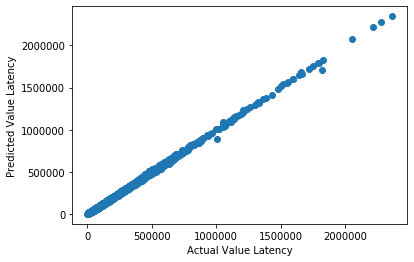

In [16]:
dnn = MLPRegressor(hidden_layer_sizes=(400,400,400))
dnn.fit(trainf,trainy)
print('R2 Score = {}'.format(dnn.score(testf, testy)))
pred = dnn.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()

R2 Score on Transfer Data= 0.6288141557095719
RMSE Loss on Transfer Data= 86517.1241390048


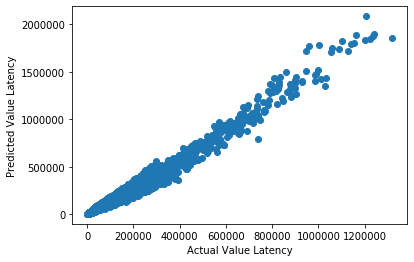

In [17]:
#### 237 Data
with open('237/1layer.csv', 'r') as f:
  reader = csv.reader(f)
  d = list(reader)
d = d[1:]
d = np.asarray(d, dtype=float)
onelayerdata = np.zeros((d.shape[0], d.shape[1]+2), dtype=float)
onelayerdata[:,:6]=d[:,:6]
onelayerdata[:,8:10]=d[:,6:9]
onelayerdata=onelayerdata[onelayerdata[:,0]==224]
d=genfromtxt('237/2layer.csv', delimiter=',')
d=d[:,:-1]
twolayerdata=d
d=genfromtxt('237/3layer.csv', delimiter=',')
d=d[:,:-1]
threelayerdata=d
totaldata=np.concatenate((onelayerdata, twolayerdata, threelayerdata))
hwfeatures=np.tile(hardware237, (len(totaldata),1) )
transferdata = np.hstack((hwfeatures, totaldata))
transferfeatures = transferdata[:,:15]
transfervalues = transferdata[:,15]
print('R2 Score on Transfer Data= {}'.format(dnn.score(transferfeatures, transfervalues)))
pred = dnn.predict(transferfeatures)
print('RMSE Loss on Transfer Data= {}'.format(np.sqrt(np.mean((transfervalues-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(transfervalues, pred)
plt.show()